# ⚡ Power Output Prediction using Artificial Neural Network (ANN)

**This notebook explores power output prediction using an Artificial Neural Network (ANN). The goal is to model the relationship between environmental conditions and power output using TensorFlow and Keras.**

| Feature | Description           |
| ------- | --------------------- |
| AT      | Ambient Temperature   |
| V       | Exhaust Vacuum        |
| AP      | Ambient Pressure      |
| RH      | Relative Humidity     |
| PE      | Power Output (Target) |


In [1]:
# Importing the libraries
import numpy as np, random
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# so runs are consistent.
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

## 1. Data Loading and Exploration

In [3]:
# Loading the dataset
df = pd.read_excel('Folds5x2_pp.xlsx')

In [4]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [5]:
df.tail()

,AT,V,AP,RH,PE
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [7]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [8]:
# Checking for missing values
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

## 2. Feature Selection

In [9]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [10]:
X

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62
...,...,...,...,...
9563,16.65,49.69,1014.01,91.00
9564,13.19,39.18,1023.67,66.78
9565,31.32,74.33,1012.92,36.48
9566,24.48,69.45,1013.86,62.39


In [11]:
y

0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: PE, Length: 9568, dtype: float64

In [12]:
# Normalize / scale features explicitly
sc = StandardScaler()

X = sc.fit_transform(X)

In [13]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 3. Model Building

In [14]:
# Initializing the ANN
ann = tf.keras.models.Sequential()

In [15]:
# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [16]:
# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [17]:
# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1))

## 4. Training and Evaluation

In [18]:
# Compiling the ANN
ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [19]:
# Training the ANN model on the Training set
history = ann.fit(X_train, y_train, validation_data=(X_train, y_train),batch_size=32, epochs=100)

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 205203.7500 - mae: 452.6729 - val_loss: 202592.6875 - val_mae: 449.7689
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 195600.5156 - mae: 441.8192 - val_loss: 185099.2031 - val_mae: 429.6725
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 165546.8281 - mae: 405.3863 - val_loss: 140676.2500 - val_mae: 372.7315
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 109613.5625 - mae: 324.0705 - val_loss: 77756.7422 - val_mae: 267.2580
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 54364.0234 - mae: 214.3963 - val_loss: 36517.4844 - val_mae: 170.4738
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 28105.5703 - mae: 146.4772 - val_loss: 22365.2324 - val_mae: 129.6269
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 19467.5195 - mae: 120.7187 - val_loss: 17107.8965 - val_mae: 113.4587
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 15264.6758 - ma

In [20]:
# Predicting the results of the Test set
pred = ann.predict(X_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


In [21]:
# Display the architecture of the ANN model
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 239 (960.00 B)

 Trainable params: 79 (316.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 160 (644.00 B)

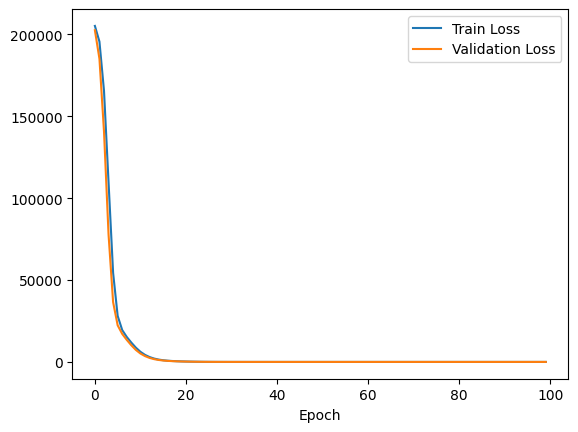

In [22]:
# Plot the training loss over epochs to visualize model convergence
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.legend()

In [23]:
# Print Mean Squared Error and R² score for predictions
print('MSE:', mean_squared_error(y_test, pred))
print('R2:', r2_score(y_test, pred))

MSE: 19.34265786658153
R2: 0.9338685048786396


Text(0, 0.5, 'Predictions')

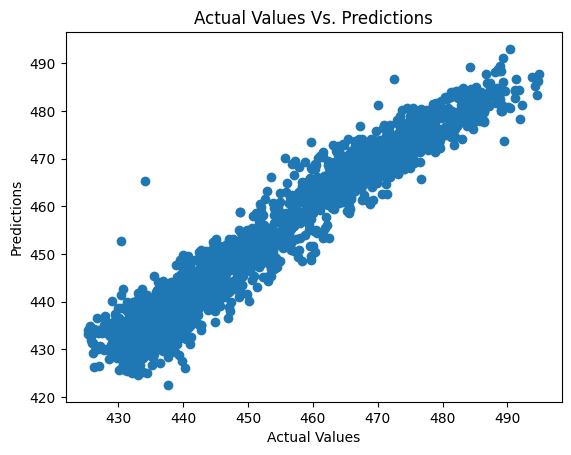

In [24]:
# Visualize the relationship between actual and predicted values
plt.scatter(x=y_test, y=pred)
plt.title('Actual Values Vs. Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')